# Mtoto News Childline Prediction Challenge.

## Introduction
The objective of this competition is to create a forecast model to predict the number of incoming calls that Childline Kenya will receive per hour per day.

## Library Imports

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data.
The data available is in three files;
1. train.csv - contains train data.
2. KenyaPublicHolidays2016.csv	- list of public holidays in 2016
3. WeatherNairobi2016.xls - weather details.

In [33]:
df_train = pd.read_csv('train.csv')


/home/muoki/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,13,14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
df_train.head(2)

,calldate,cc_status,maincat,subcat1,casepriority,referal,caller_gender,caller_age,caller_county,child_age,child_gender,child_county,parent_age,parent_gender,parent_county,Abuser_Relationship,Neglector_Relationship,Perpetrator_Relationship,Physical abuser_Relationship
0,2016-01-01 07:26:47,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 07:32:30,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_train.shape

(135988, 19)

In [36]:
df_train['calldate'] = pd.to_datetime(df_train['calldate'])

In [37]:
df = df_train

combine holiday and train ds

In [43]:
def timeconvert(now):
    tnow = now.replace(minute=0, second=0)
    if now.hour == 23:
        tnow = tnow.replace(hour=0)
    else:
        tnow = tnow.replace(hour=(tnow.hour+1),)
    #return tnow.strftime("%Y%m%d%H")
    return tnow

In [47]:
df['calldate'] = df['calldate'].apply(timeconvert)

In [50]:
df.nunique()

calldate                        3697
cc_status                          3
maincat                            8
subcat1                           48
casepriority                       3
referal                           56
caller_gender                      3
caller_age                         5
caller_county                     55
child_age                          7
child_gender                       3
child_county                      53
parent_age                        19
parent_gender                      2
parent_county                     20
Abuser_Relationship               34
Neglector_Relationship            13
Perpetrator_Relationship          41
Physical abuser_Relationship      23
dtype: int64

In [64]:
df.isna().sum()

calldate                             0
cc_status                            0
maincat                              0
subcat1                              0
casepriority                         0
referal                         134726
caller_gender                   124440
caller_age                      125256
caller_county                   127321
child_age                       132009
child_gender                    131996
child_county                    132239
parent_age                      135955
parent_gender                   135919
parent_county                   135940
Abuser_Relationship             135748
Neglector_Relationship          135840
Perpetrator_Relationship        135858
Physical abuser_Relationship    135875
dtype: int64

Apart from the first 5 features the rest have a significant number of null values. 
#### getting the dependent variable call counts.

In [53]:
df2 = df.groupby(['calldate']).size().reset_index(name='callcount')

In [70]:
df2.to_csv('ndata.csv')

## Visualization

In [66]:
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('ndata.csv',parse_dates=['calldate'])
df.head()

,Unnamed: 0,calldate,callcount
0,0,2016-01-01 00:00:00,28
1,1,2016-01-01 08:00:00,8
2,2,2016-01-01 09:00:00,41
3,3,2016-01-01 10:00:00,20
4,4,2016-01-01 11:00:00,34


In [74]:
df = df.drop('Unnamed: 0', axis=1)

In [76]:
df.head(5)

,calldate,callcount
0,2016-01-01 00:00:00,28
1,2016-01-01 08:00:00,8
2,2016-01-01 09:00:00,41
3,2016-01-01 10:00:00,20
4,2016-01-01 11:00:00,34


In [84]:
df['dates'] = pd.to_datetime(df['calldate']).dt.date
df['times'] = pd.to_datetime(df['calldate']).dt.time

In [85]:
df.head(5)

,calldate,callcount,dates,times
0,2016-01-01 00:00:00,28,2016-01-01,00:00:00
1,2016-01-01 08:00:00,8,2016-01-01,08:00:00
2,2016-01-01 09:00:00,41,2016-01-01,09:00:00
3,2016-01-01 10:00:00,20,2016-01-01,10:00:00
4,2016-01-01 11:00:00,34,2016-01-01,11:00:00


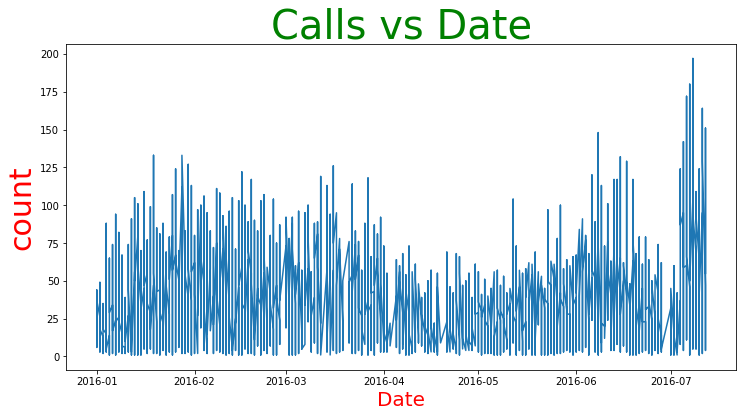

In [80]:
plt.figure(figsize=(12,6))
plt.plot(df['dates'],df['callcount'])
plt.title("Calls vs Date",fontsize=40,color='g')
plt.xlabel("Date",fontsize=20,color='r')
plt.ylabel("count",fontsize=30,color='r')
plt.show()

197

## Modeling

In [83]:
from sklearn import cross_validation,preprocessing
from sklearn.linear_model import LinearRegression

/home/muoki/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [87]:
X=np.array(df.drop(['callcount','calldate'],1))
#X=preprocessing.scale(X)

# drop the null values
y=np.array(df['callcount'])

In [88]:
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.3)

## Results

## Conclusions